In [1]:
import sys
sys.path.insert(1, '/storage/home/nxt5197/work/530_stellar_atmospheres/lib/')
from statmospheres import log_integrator
from statmospheres import better_integrator
from statmospheres import ave
from scipy.special import wofz
from statmospheres import Voigt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../lib/plt_format.mplstyle')
from scipy.special import expn

In [21]:
# Most precise calculation with a simple box integrator in about a second
ns=[1,2,3]
x_min=-20
x_max=2
density=90000
points = round(density*(x_max-x_min))
print(f'Number of points: {points}')
for n in ns:
    x=10**np.linspace(x_min,x_max,points)
    ans = better_integrator(x,expn(n,x))
    print(f'n = {n}\t\tEn(x) = {ans}\t\tPrecision: {abs(1-ans/(1/n))}')

Number of points: 1980000
n = 1		En(x) = 1.0000000001090878		Precision: 1.0908784986440878e-10
n = 2		En(x) = 0.5000000000545421		Precision: 1.0908429715072998e-10
n = 3		En(x) = 0.3333333333696957		Precision: 1.09087183730594e-10


n = 1	Minimum precision: 5.168421246537491e-12	x_max = 1.2969696969696969
n = 2	Minimum precision: 9.176659432341694e-12	x_max = 1.3131313131313131
n = 3	Minimum precision: 1.280020534011328e-11	x_max = 1.3212121212121213


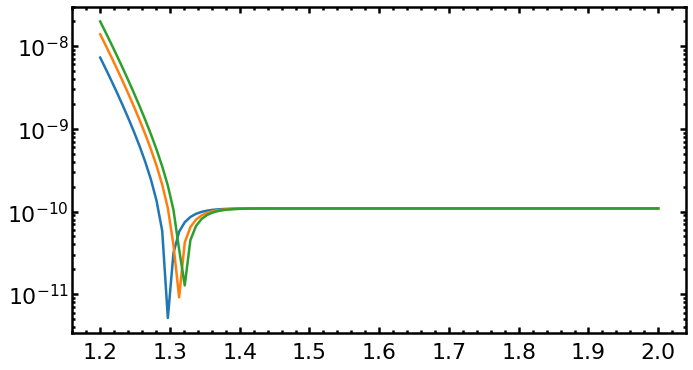

In [5]:
# integrate over x_max values to find a minimum
density=90000
x_range = np.linspace(1.2,2,100)
minp = [0]*len(ns)
x_maxest = [0]*len(ns)
ans = [[0]*len(x_range) for n in range(len(ns))]
precision = [[0]*len(x_range) for n in range(len(ns))]
for n in ns:
    for i, x_max in enumerate(x_range):
        points = round(density*(x_max-x_min))
        x=10**np.linspace(x_min,x_max,points)
        ans[n-1][i] = better_integrator(x,expn(n,x))
        precision[n-1][i] = abs(1-ans[n-1][i]/(1/n))
    minp[n-1]=min(precision[n-1])
    x_maxest[n-1] = x_range[np.where(precision[n-1] == minp[n-1])]
    print(f'n = {n}\tMinimum precision: {minp[n-1]}\tx_max = {x_maxest[n-1][0]}')
    plt.plot(x_range,precision[n-1])
plt.yscale('log')
plt.show()

n = 1		Minimum precision: 3.314126750808555e-11		points = 1648947
n = 2		Minimum precision: 4.6941006637268856e-11		points = 2752697
n = 3		Minimum precision: 4.332023628705883e-11		points = 2753740


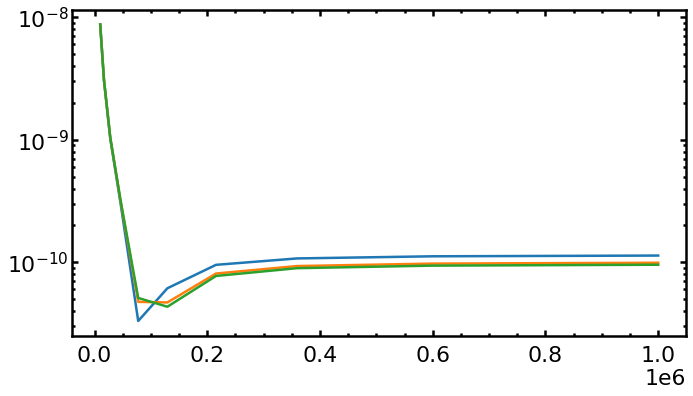

In [6]:
# Using the local minimums for x_max above, integrate over densities to find a minimum
x_range = 10**np.linspace(4,6,10)
minp = [0]*len(ns)
densest = [0]*len(ns)
ans = [[0]*len(x_range) for n in range(len(ns))]
precision = [[0]*len(x_range) for n in range(len(ns))]
for n in ns:
    x_max=x_maxest[n-1][0]
    for i, density in enumerate(x_range):
        points = round(density*(x_max-x_min))
        x=10**np.linspace(x_min,x_max,points)
        ans[n-1][i] = better_integrator(x,expn(n,x))
        precision[n-1][i] = abs(1-ans[n-1][i]/(1/n))
    minp[n-1]=min(precision[n-1])
    densest[n-1] = x_range[np.where(precision[n-1] == minp[n-1])]
    print(f'n = {n}\t\tMinimum precision: {minp[n-1]}\t\tpoints = {round(densest[n-1][0]*(x_max-x_min))}')
    plt.plot(x_range,precision[n-1])
plt.yscale('log')
plt.show()

n = 1		Minimum precision: 2.006095289885934e-11		x_max = 1.2888888888888888
n = 2		Minimum precision: 8.637979220793568e-12		x_max = 1.3292929292929292
n = 3		Minimum precision: 1.081912337497215e-11		x_max = 1.3373737373737373


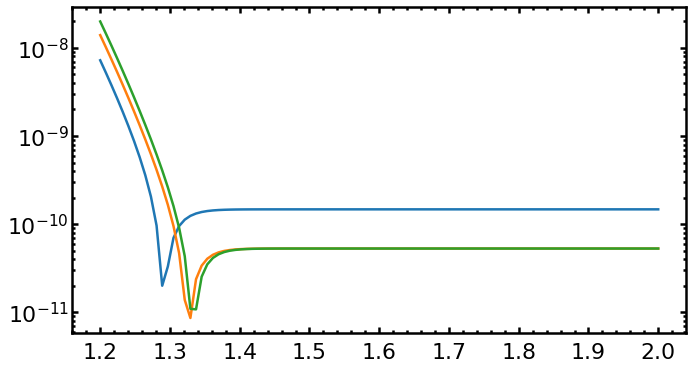

In [7]:
# reiterate for x_max using above density minimums
x_range = np.linspace(1.2,2,100)
minp = [0]*len(ns)
x_maxest = [0]*len(ns)
ans = [[0]*len(x_range) for n in range(len(ns))]
precision = [[0]*len(x_range) for n in range(len(ns))]
for n in ns:
    density = densest[n-1][0]
    for i, x_max in enumerate(x_range):
        points = round(density*(x_max-x_min))
        x=10**np.linspace(x_min,x_max,points)
        ans[n-1][i] = better_integrator(x,expn(n,x))
        precision[n-1][i] = abs(1-ans[n-1][i]/(1/n))
    minp[n-1]=min(precision[n-1])
    x_maxest[n-1] = x_range[np.where(precision[n-1] == minp[n-1])]
    print(f'n = {n}\t\tMinimum precision: {minp[n-1]}\t\tx_max = {x_maxest[n-1][0]}')
    plt.plot(x_range,precision[n-1])
plt.yscale('log')
plt.show()

n = 1		Minimum precision: 2.006095289885934e-11		points = 1648321
n = 2		Minimum precision: 8.637979220793568e-12		points = 2754784
n = 3		Minimum precision: 1.081912337497215e-11		points = 2755828


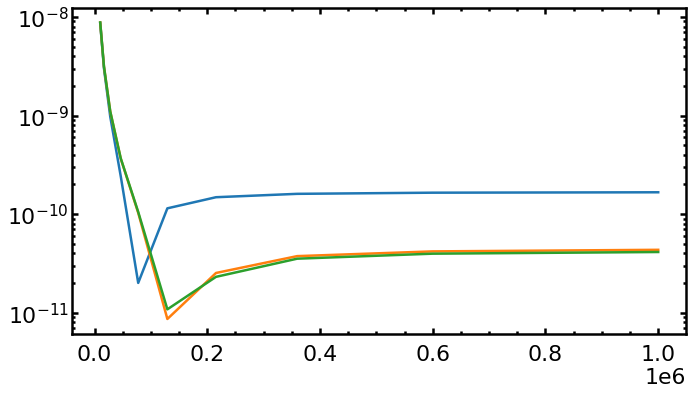

In [8]:
# reiterate for density using reiterated x_max minimums
x_range = 10**np.linspace(4,6,10)
minp = [0]*len(ns)
densest = [0]*len(ns)
ans = [[0]*len(x_range) for n in range(len(ns))]
precision = [[0]*len(x_range) for n in range(len(ns))]
for n in ns:
    x_max=x_maxest[n-1][0]
    for i, density in enumerate(x_range):
        points = round(density*(x_max-x_min))
        x=10**np.linspace(x_min,x_max,points)
        ans[n-1][i] = better_integrator(x,expn(n,x))
        precision[n-1][i] = abs(1-ans[n-1][i]/(1/n))
    minp[n-1]=min(precision[n-1])
    densest[n-1] = x_range[np.where(precision[n-1] == minp[n-1])]
    print(f'n = {n}\t\tMinimum precision: {minp[n-1]}\t\tpoints = {round(densest[n-1][0]*(x_max-x_min))}')
    plt.plot(x_range,precision[n-1])
plt.yscale('log')
plt.show()

In [26]:
# Most precise calculation with a better logspace integrator (dlnx)
ns=[1,2,3]
x_min=-22
x_max=2
density=30
points = round(density*(x_max-x_min))
print(f'Number of points: {points}')
for n in ns:
    x=10**np.linspace(x_min,x_max,points)
    ans = log_integrator(x,expn(n,x))
    print(f'n = {n}\t\tEn(x) = {ans}\t\tPrecision: {abs(1-ans/(1/n))}')

Number of points: 720
n = 1		En(x) = 1.0		Precision: 0.0
n = 2		En(x) = 0.5000000000000001		Precision: 2.220446049250313e-16
n = 3		En(x) = 0.33333333333333326		Precision: 2.220446049250313e-16


n = 1	Minimum precision: 0.0	x_max = 1.507070707070707
n = 2	Minimum precision: 0.0	x_max = 1.5393939393939393
n = 3	Minimum precision: 0.0	x_max = 1.587878787878788


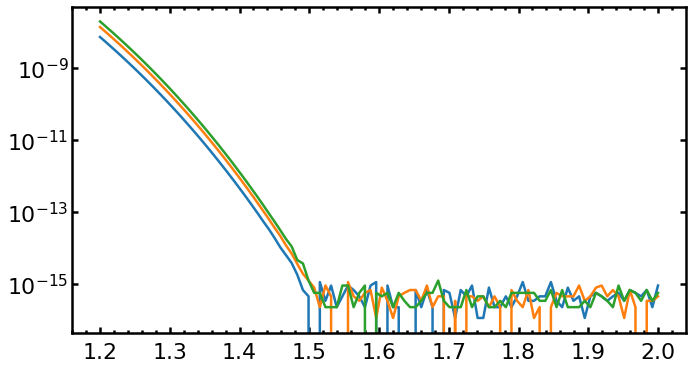

In [27]:
# integrate over x_max values to find a minimum
density=9000
x_range = np.linspace(1.2,2,100)
minp = [0]*len(ns)
x_maxest = [0]*len(ns)
ans = [[0]*len(x_range) for n in range(len(ns))]
precision = [[0]*len(x_range) for n in range(len(ns))]
for n in ns:
    for i, x_max in enumerate(x_range):
        points = round(density*(x_max-x_min))
        x=10**np.linspace(x_min,x_max,points)
        ans[n-1][i] = log_integrator(x,expn(n,x))
        precision[n-1][i] = abs(1-ans[n-1][i]/(1/n))
    minp[n-1]=min(precision[n-1])
    x_maxest[n-1] = x_range[np.where(precision[n-1] == minp[n-1])]
    print(f'n = {n}\tMinimum precision: {minp[n-1]}\tx_max = {x_maxest[n-1][0]}')
    plt.plot(x_range,precision[n-1])
plt.yscale('log')
plt.show()

n = 1		Minimum precision: 3.3306690738754696e-16		points = 1091
n = 2		Minimum precision: 0.0		points = 50714
n = 3		Minimum precision: 0.0		points = 1095


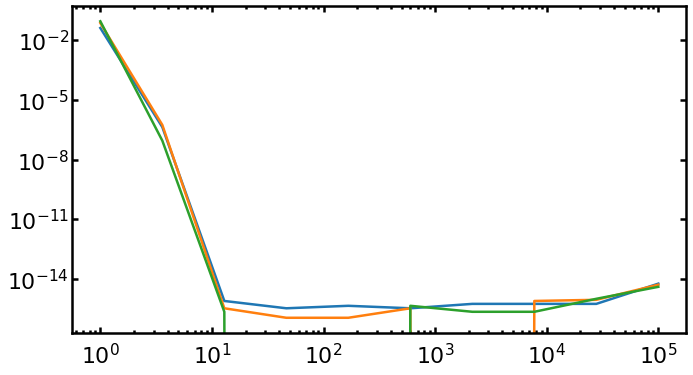

In [28]:
# Using the local minimums for x_max above, integrate over densities to find a minimum
x_range = 10**np.linspace(0,5,10)
minp = [0]*len(ns)
densest = [0]*len(ns)
ans = [[0]*len(x_range) for n in range(len(ns))]
precision = [[0]*len(x_range) for n in range(len(ns))]
for n in ns:
    x_max=x_maxest[n-1][0]
    for i, density in enumerate(x_range):
        points = round(density*(x_max-x_min))
        x=10**np.linspace(x_min,x_max,points)
        ans[n-1][i] = log_integrator(x,expn(n,x))
        precision[n-1][i] = abs(1-ans[n-1][i]/(1/n))
    minp[n-1]=min(precision[n-1])
    densest[n-1] = x_range[np.where(precision[n-1] == minp[n-1])]
    print(f'n = {n}\t\tMinimum precision: {minp[n-1]}\t\tpoints = {round(densest[n-1][0]*(x_max-x_min))}')
    plt.plot(x_range,precision[n-1])
plt.yscale('log')
plt.xscale('log')
plt.show()

n = 1		Minimum precision: 0.0		x_max = 1.5474747474747474
n = 2		Minimum precision: 0.0		x_max = 1.5232323232323233
n = 3		Minimum precision: 0.0		x_max = 1.5313131313131314


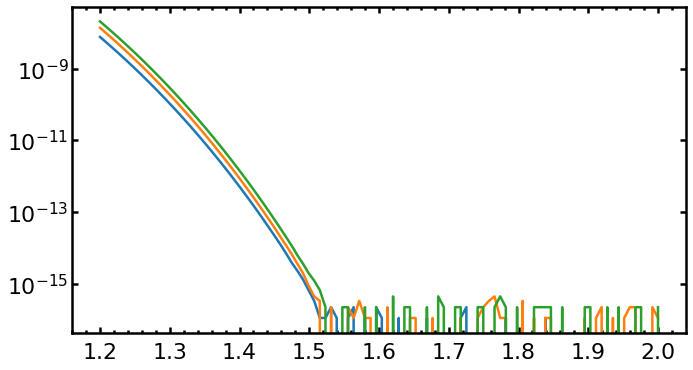

In [29]:
# reiterate for x_max using above density minimums
x_range = np.linspace(1.2,2,100)
minp = [0]*len(ns)
x_maxest = [0]*len(ns)
ans = [[0]*len(x_range) for n in range(len(ns))]
precision = [[0]*len(x_range) for n in range(len(ns))]
for n in ns:
    density = densest[n-1][0]
    for i, x_max in enumerate(x_range):
        points = round(density*(x_max-x_min))
        x=10**np.linspace(x_min,x_max,points)
        ans[n-1][i] = log_integrator(x,expn(n,x))
        precision[n-1][i] = abs(1-ans[n-1][i]/(1/n))
    minp[n-1]=min(precision[n-1])
    x_maxest[n-1] = x_range[np.where(precision[n-1] == minp[n-1])]
    print(f'n = {n}\t\tMinimum precision: {minp[n-1]}\t\tx_max = {x_maxest[n-1][0]}')
    plt.plot(x_range,precision[n-1])
plt.yscale('log')
plt.show()

n = 1		Minimum precision: 0.0		points = 10930
n = 2		Minimum precision: 1.1102230246251565e-16		points = 3924
n = 3		Minimum precision: 0.0		points = 3925


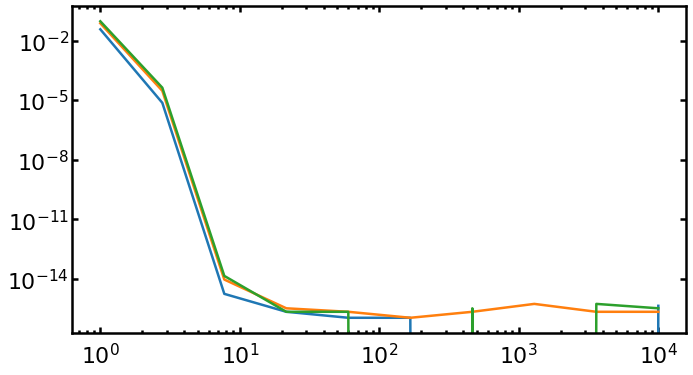

In [30]:
# reiterate for density using reiterated x_max minimums
x_range = 10**np.linspace(0,4,10)
minp = [0]*len(ns)
densest = [0]*len(ns)
ans = [[0]*len(x_range) for n in range(len(ns))]
precision = [[0]*len(x_range) for n in range(len(ns))]
for n in ns:
    x_max=x_maxest[n-1][0]
    for i, density in enumerate(x_range):
        points = round(density*(x_max-x_min))
        x=10**np.linspace(x_min,x_max,points)
        ans[n-1][i] = log_integrator(x,expn(n,x))
        precision[n-1][i] = abs(1-ans[n-1][i]/(1/n))
    minp[n-1]=min(precision[n-1])
    densest[n-1] = x_range[np.where(precision[n-1] == minp[n-1])]
    print(f'n = {n}\t\tMinimum precision: {minp[n-1]}\t\tpoints = {round(densest[n-1][0]*(x_max-x_min))}')
    plt.plot(x_range,precision[n-1])
plt.yscale('log')
plt.xscale('log')
plt.show()

In [31]:
# Most precise calculation with a simple box integrator
ns=[1,2,3]
x_min=-22
x_max=1.56
density=12
points = round(density*(x_max-x_min))
print(f'Number of points: {points}')
for n in ns:
    x=10**np.linspace(x_min,x_max,points)
    ans = log_integrator(x,expn(n,x))
    print(f'n = {n}\t\tEn(x) = {ans}\t\tPrecision: {abs(1-ans/(1/n))}')

Number of points: 283
n = 1		En(x) = 1.0		Precision: 0.0
n = 2		En(x) = 0.5		Precision: 0.0
n = 3		En(x) = 0.3333333333333333		Precision: 0.0


In [45]:
# 8

# S_nu(tau_nu):
def S_nu(a0,a1,a2,tau):
    return a0+a1*tau+a2*tau**2

# H_nu(0):
def J_nu0(a0,a1,a2,tau):
    return 0.5*log_integrator(tau,S_nu(a0,a1,a2,tau)*expn(1,tau))

# H_nu(0):
def H_nu0(a0,a1,a2,tau):
    return 0.5*log_integrator(tau,S_nu(a0,a1,a2,tau)*expn(2,tau))

# Using the fast, but still relatively precise limits as in problem 6:
tau_min=-20
tau_max=1.31
density=90000
points = round(density*(tau_max-tau_min))
tau=10**np.linspace(tau_min,tau_max,points)
# Arbitrary coefficients a0, a1, a2:
a0=np.random.random()
a1=np.random.random()
a2s=[-np.random.random(),0,np.random.random()]
for a2 in a2s:
    print(f'Coefficients: a0 = {a0}, a1 = {a1}, a2 = {a2}')
    H = H_nu0(a0,a1,a2,tau)
    J = J_nu0(a0,a1,a2,tau)
    S_J = S_nu(a0,a1,a2,1/2)/2
    S_H = S_nu(a0,a1,a2,2/3)/4
    if a2 == 0:
        print(f'Jv(0) = {J}\t\t\tHv(0) = {H}\nSv(1/2)/2 = {S_J}\t\t\tSv(2/3)/4 = {S_H}\nExtra estimated: {(J-S_J)}\t\tExtra estimated: {(H-S_H)}\n')
    else:
        print(f'Jv(0) = {J}\t\t\tHv(0) = {H}\nSv(1/2)/2 = {S_J}\t\t\tSv(2/3)/4 = {S_H}\nExtra estimated: {(J-S_J)/a2}\t\tExtra estimated: {(H-S_H)/a2}\n')
    # print(f'Hv(0) = {H}\nSv(2/3)/4 = {S_H}\nExtra estimated: {(H-S_H)}\n\n')

Coefficients: a0 = 0.0792867469898827, a1 = 0.46566946153690225, a2 = -0.7952566561869235
Jv(0) = -0.10902480242006174			Hv(0) = -0.10138089005680284
Sv(1/2)/2 = 0.05665365685580147			Sv(2/3)/4 = 0.00907141298285176
Extra estimated: 0.20833331979923828		Extra estimated: 0.1388888759123985

Coefficients: a0 = 0.0792867469898827, a1 = 0.46566946153690225, a2 = 0
Jv(0) = 0.15606073857417713			Hv(0) = 0.09743326337788717
Sv(1/2)/2 = 0.1560607388791669			Sv(2/3)/4 = 0.0974332636702877
Extra estimated: -3.04989783428411e-10		Extra estimated: -2.924005343407643e-10

Coefficients: a0 = 0.0792867469898827, a1 = 0.46566946153690225, a2 = 0.9235707497990351
Jv(0) = 0.4639176423199611			Hv(0) = 0.32832593850336017
Sv(1/2)/2 = 0.2715070826040463			Sv(2/3)/4 = 0.2000522358701805
Extra estimated: 0.2083333190854977		Extra estimated: 0.13888887522812027

